<b>SUMMARY:</b><br/> The goal is to analyze Suicides dataset to find out if there is a relation between suicides and GDP. The data includes suicides information from 101 countries for a span of 30 years (1984 to 2014) along with gender and GDP.

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [224]:
fields = ['country', 'year','sex','age','suicides_no','population','HDI for year',' gdp_for_year ($) ','gdp_per_capita ($)','generation']
df = pd.read_csv(r"C:\Users\Niranjan\Desktop\Data Science\Exercises (my work)\Kaggle datasets for capstone\suicide data.csv",usecols=fields)
df.rename(columns={' gdp_for_year ($) ':'gdp_for_year_in_dollars',
                          'gdp_per_capita ($)':'gdp_per_capita_in_dollars',
                          'HDI for year':'HDI_for_year'}, 
                 inplace=True)
df.head(10)

,country,year,sex,age,suicides_no,population,HDI_for_year,gdp_for_year_in_dollars,gdp_per_capita_in_dollars,generation
0,Albania,1987,male,15-24 years,21,312900,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,NaN,"2,156,624,900",796,Generation X


In [312]:
df_countries_in_1987 = pd.Series(df.query('year==1985')['country'].unique())
df_countries_in_1987
print('Year range for the dataset: {} to {}'.format(min(df.year),max(df.year)))

Year range for the dataset: 1985 to 2016


In [313]:
#Aggregate suicide data per country per year
df_aggby_ctry_yr_unfiltered = (df.groupby(['country','year']).agg({'population':sum,'suicides_no':sum,'gdp_per_capita_in_dollars':max})).reset_index()
df_aggby_ctry_yr_unfiltered['suicides_per_100k_people'] = round((100000 * df_aggby_ctry_yr_unfiltered['suicides_no']) / df_aggby_ctry_yr_unfiltered['population'],2)
df_aggby_ctry_yr_unfiltered.head(5)

,country,year,population,suicides_no,gdp_per_capita_in_dollars,suicides_per_100k_people
0,Albania,1987,2709600,73,796,2.69
1,Albania,1988,2764300,63,769,2.28
2,Albania,1989,2803100,68,833,2.43
3,Albania,1992,2822500,47,251,1.67
4,Albania,1993,2807300,73,437,2.60


In [317]:
df_pivot = df_aggby_ctry_yr_unfiltered.query('year>1990 and year<2015').pivot_table('suicides_no', 'country', 'year').dropna(axis='rows')
#df_pivot
countries_for_analysis = pd.Series(df_pivot.index.get_values())
print('Number of countries for analysis for the years 1990 to 2015: ',countries_for_analysis.count())
countries_for_analysis.head(5)

Number of countries for analysis for the years 1990 to 2015:  39


0    Argentina
1      Austria
2      Belgium
3       Brazil
4     Bulgaria
dtype: object

In [318]:
#Filter the Aggregate data by the above 39 countries
df_aggby_ctry_yr = df_aggby_ctry_yr_unfiltered[df_aggby_ctry_yr_unfiltered.country.isin(countries_for_analysis)].query('year>1990 and year<2015').reset_index()
df_aggby_ctry_yr.head(5)

,index,country,year,population,suicides_no,gdp_per_capita_in_dollars,suicides_per_100k_people
0,55,Argentina,1991,29623000,1951,6404,6.59
1,56,Argentina,1992,30045400,2184,7615,7.27
2,57,Argentina,1993,30477500,2230,7768,7.32
3,58,Argentina,1994,30911200,2241,8328,7.25
4,59,Argentina,1995,31345400,2204,8232,7.03


Text(0, 0.5, 'Suicides per 100k population')

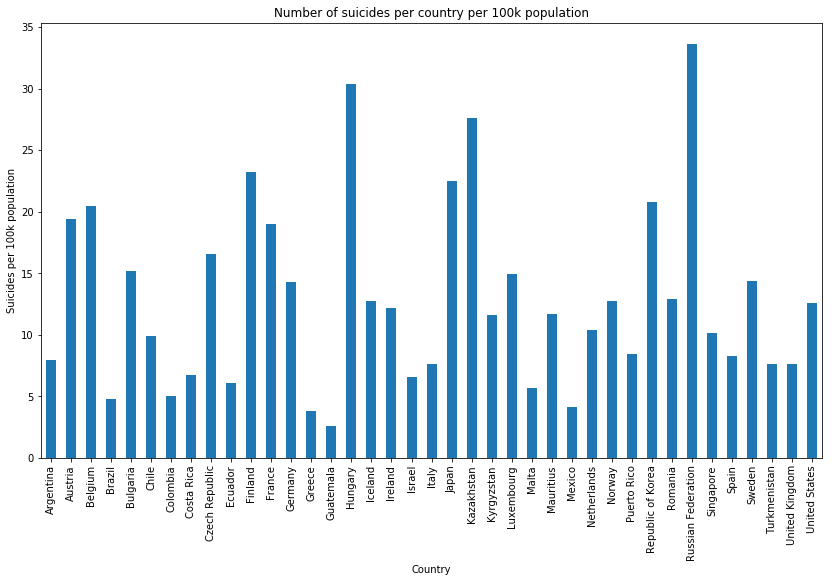

In [368]:
SuicidesPlotPer100k = df_aggby_ctry_yr.groupby(['country'])['suicides_per_100k_people'].mean().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of suicides per country per 100k population")
SuicidesPlotPer100k.set_xlabel("Country")
SuicidesPlotPer100k.set_ylabel("Suicides per 100k population")

In [377]:
#top 10 countries with highest suicide rates over a period of 25 years
df_top10_mean_suicides_per_country = (df_aggby_ctry_yr.groupby(['country']).agg({'suicides_per_100k_people':'mean'})).sort_values('suicides_per_100k_people', ascending=False).nlargest(10, 'suicides_per_100k_people').reset_index()
df_top10_mean_suicides_per_country

,country,suicides_per_100k_people
0,Russian Federation,33.657917
1,Hungary,30.381667
2,Kazakhstan,27.635000
3,Finland,23.187500
4,Japan,22.520417
5,Republic of Korea,20.783333
6,Belgium,20.457917
7,Austria,19.389167
8,France,19.006250
9,Czech Republic,16.566250


In [320]:
#Calculate mean GDP per capita, minimum GDP per capita, maximum GDP per caita for those 39 countries and sort the data by mean GDP per capita ascending
df_cnt_years_by_country = df_aggby_ctry_yr.groupby('country').agg(
    {'year':['count'],
     'gdp_per_capita_in_dollars':['mean', 'min','max']}).reset_index()
df_cnt_years_by_country.columns = ["_".join(x) for x in df_cnt_years_by_country.columns.ravel()]
df_cnt_years_by_country.rename(columns={'country_':'country',
                                        'year_count':'years',
                          'gdp_per_capita_in_dollars_mean':'gdp_per_capita_in_dollars',
                          'gdp_per_capita_in_dollars_min':'gdp_min',
                          'gdp_per_capita_in_dollars_max':'gdp_max'}, 
                 inplace=True)
df_cnt_years_by_country['gdp_diff'] = df_cnt_years_by_country['gdp_max'] - df_cnt_years_by_country['gdp_min']
df_cnt_years_by_country['gdp_timesgrowth'] = df_cnt_years_by_country['gdp_max'] / df_cnt_years_by_country['gdp_min']

print('count:{}, mean of GDP:{}'.format(len(df_cnt_years_by_country),np.mean(df_cnt_years_by_country.gdp_per_capita_in_dollars)))
df_cnt_years_by_country_sorted = df_cnt_years_by_country[['country','years','gdp_per_capita_in_dollars','gdp_min','gdp_max','gdp_diff','gdp_timesgrowth']].sort_values('gdp_per_capita_in_dollars').reset_index()
df_cnt_years_by_country_sorted.head(5)

count:39, mean of GDP:22991.209401709402


,index,country,years,gdp_per_capita_in_dollars,gdp_min,gdp_max,gdp_diff,gdp_timesgrowth
0,22,Kyrgyzstan,24,697.458333,291,1465,1174,5.034364
1,14,Guatemala,24,2425.041667,1194,4210,3016,3.525963
2,36,Turkmenistan,24,2696.500000,608,9046,8438,14.878289
3,9,Ecuador,24,3513.416667,1650,7116,5466,4.312727
4,4,Bulgaria,24,3901.875000,1213,8241,7028,6.793899


In [322]:
#divide the data into 3 groups and 13 each. Low mean GDP per capita group, high mean GDP per capita group and medium mean GDP per capita group
df_cnt_years_by_country_lowGDP = df_cnt_years_by_country_sorted.loc[0:12]
df_cnt_years_by_country_mediumGDP = df_cnt_years_by_country_sorted.loc[13:25]
df_cnt_years_by_country_highGDP = df_cnt_years_by_country_sorted.loc[26:38]

In [380]:
#take the above 39 countries that have 25 years of data and find out the correlation between number of suicides and GDP pr caita
df_corr = (df_aggby_ctry_yr.groupby('country')[['suicides_per_100k_people','gdp_per_capita_in_dollars']].corr(method='pearson').iloc[0::2,-1]).reset_index()
df_corr.rename(columns={'gdp_per_capita_in_dollars':'correlation_value'}, inplace=True)
df_corr = df_corr.drop(['level_1'], axis=1)
df_corr = pd.merge(df_corr, df_cnt_years_by_country, on="country")
df_corr.head(5)

,country,correlation_value,years,gdp_per_capita_in_dollars,gdp_min,gdp_max,gdp_diff,gdp_timesgrowth
0,Argentina,-0.304579,24,8625.291667,2840,14206,11366,5.002113
1,Austria,-0.881911,24,37655.166667,23808,54294,30486,2.280494
2,Belgium,-0.676031,24,35646.916667,22523,51345,28822,2.279670
3,Brazil,0.832451,24,6808.416667,2924,14245,11321,4.871751
4,Bulgaria,-0.937996,24,3901.875000,1213,8241,7028,6.793899


In [379]:
#Correlation for top 10 highest suicide rate countries
df_corr_top10Suicide_countries = df_corr[df_corr.country.isin(df_top10_mean_suicides_per_country.country)]
df_corr_top10Suicide_countries

,country,correlation_value,years,gdp_per_capita_in_dollars,gdp_min,gdp_max,gdp_diff,gdp_timesgrowth
1,Austria,-0.881911,24,37655.166667,23808,54294,30486,2.280494
2,Belgium,-0.676031,24,35646.916667,22523,51345,28822,2.279670
8,Czech Republic,-0.745651,24,12199.625000,3070,23811,20741,7.756026
10,Finland,-0.874100,24,36852.416667,18826,56521,37695,3.002284
11,France,-0.810655,24,34903.333333,23821,49901,26080,2.094832
15,Hungary,-0.913921,24,9073.583333,3561,16540,12979,4.644763
20,Japan,0.050160,24,39956.791667,30688,51379,20691,1.674237
21,Kazakhstan,-0.629430,24,5206.250000,1225,15552,14327,12.695510
30,Republic of Korea,0.864095,24,16767.666667,8145,29120,20975,3.575200
32,Russian Federation,-0.916774,24,6603.833333,1412,17052,15640,12.076487


In [326]:
#Check the correlations for each group
df_corr_lowGDP = df_corr[df_corr.country.isin(df_cnt_years_by_country_lowGDP.country)].reset_index()
df_corr_mediumGDP = df_corr[df_corr.country.isin(df_cnt_years_by_country_mediumGDP.country)].reset_index()
df_corr_highGDP = df_corr[df_corr.country.isin(df_cnt_years_by_country_highGDP.country)].reset_index()

df_corr_lowGDP

,index,country,correlation_value,years,gdp_per_capita_in_dollars,gdp_min,gdp_max,gdp_diff,gdp_timesgrowth
0,3,Brazil,0.832451,24,6808.416667,2924,14245,11321,4.871751
1,4,Bulgaria,-0.937996,24,3901.875000,1213,8241,7028,6.793899
2,6,Colombia,0.091214,24,4179.291667,1348,8731,7383,6.477003
3,7,Costa Rica,0.299416,24,5815.041667,2651,11485,8834,4.332327
4,9,Ecuador,0.336334,24,3513.416667,1650,7116,5466,4.312727
5,14,Guatemala,0.793202,24,2425.041667,1194,4210,3016,3.525963
6,21,Kazakhstan,-0.629430,24,5206.250000,1225,15552,14327,12.695510
7,22,Kyrgyzstan,-0.628117,24,697.458333,291,1465,1174,5.034364
8,25,Mauritius,-0.695094,24,5997.666667,3045,11120,8075,3.651888
9,26,Mexico,0.886209,24,8126.958333,4204,11663,7459,2.774263


In [295]:
df_corr_mediumGDP

,index,country,correlation_value,years,gdp_per_capita_in_dollars,gdp_min,gdp_max,gdp_diff,gdp_timesgrowth
0,0,Argentina,-0.304579,24,8625.291667,2840,14206,11366,5.002113
1,5,Chile,0.637600,24,8518.958333,3187,17140,13953,5.378099
2,8,Czech Republic,-0.745651,24,12199.625000,3070,23811,20741,7.756026
3,11,France,-0.810655,24,34903.333333,23821,49901,26080,2.094832
4,12,Germany,-0.730310,24,35313.458333,24662,50167,25505,2.034182
5,13,Greece,0.123615,24,19330.208333,10816,33168,22352,3.066568
6,15,Hungary,-0.913921,24,9073.583333,3561,16540,12979,4.644763
7,18,Israel,-0.742692,24,25457.916667,15267,41869,26602,2.742451
8,19,Italy,-0.773575,24,29317.500000,19605,41935,22330,2.138995
9,24,Malta,0.440098,24,15638.041667,8022,27634,19612,3.444777


In [296]:
df_corr_highGDP

,index,country,correlation_value,years,gdp_per_capita_in_dollars,gdp_min,gdp_max,gdp_diff,gdp_timesgrowth
0,1,Austria,-0.881911,24,37655.166667,23808,54294,30486,2.280494
1,2,Belgium,-0.676031,24,35646.916667,22523,51345,28822,2.279670
2,10,Finland,-0.874100,24,36852.416667,18826,56521,37695,3.002284
3,16,Iceland,0.024873,24,42025.625000,25474,73590,48116,2.888828
4,17,Ireland,0.035061,24,40068.333333,15328,67173,51845,4.382372
5,20,Japan,0.050160,24,39956.791667,30688,51379,20691,1.674237
6,23,Luxembourg,-0.791152,24,78046.125000,39465,126352,86887,3.201622
7,27,Netherlands,-0.257227,24,39489.916667,22906,60375,37469,2.635772
8,28,Norway,-0.691737,24,63095.791667,30066,109804,79738,3.652099
9,33,Singapore,-0.419906,24,43153.041667,17768,84442,66674,4.752476


In [349]:
#count the countries that have a correlation greater than 0.5 and less than -0.5
df_corr_filter = df_corr.query('correlation_value >= 0.5 or correlation_value <= -0.5').reset_index()
print('count: ',len(df_corr_filter))
df_corr_filter.sort_values('correlation_value').head(5)

count:  25


,index,country,correlation_value,years,gdp_per_capita_in_dollars,gdp_min,gdp_max,gdp_diff,gdp_timesgrowth
3,4,Bulgaria,-0.937996,24,3901.875000,1213,8241,7028,6.793899
21,32,Russian Federation,-0.916774,24,6603.833333,1412,17052,15640,12.076487
10,15,Hungary,-0.913921,24,9073.583333,3561,16540,12979,4.644763
0,1,Austria,-0.881911,24,37655.166667,23808,54294,30486,2.280494
6,10,Finland,-0.874100,24,36852.416667,18826,56521,37695,3.002284


In [328]:
print('Count of countries that have low correlation from {} countries: {}'.format(len(df_corr),len(df_corr_filter)))
print('Number of countries with a positive correlation: ',len(df_corr_filter[df_corr_filter.correlation_value>0]))
print('Number of countries with a negative correlation: ',len(df_corr_filter[df_corr_filter.correlation_value<0]))

Count of countries that have low correlation from 39 countries: 25
Number of countries with a positive correlation:  5
Number of countries with a negative correlation:  20


In [329]:
df_corr_lowGDP_filter = df_corr_filter[df_corr_filter.country.isin(df_corr_lowGDP['country'])]

print('Count of countries that have high correlation from {} low GDP per capita countries: {}'.format(len(df_corr_lowGDP),len(df_corr_lowGDP_filter)))
print('Number of countries with a positive correlation: ',len(df_corr_lowGDP_filter[df_corr_lowGDP_filter.correlation_value>0]))
print('Number of countries with a negative correlation: ',len(df_corr_lowGDP_filter[df_corr_lowGDP_filter.correlation_value<0]))

Count of countries that have high correlation from 13 low GDP per capita countries: 9
Number of countries with a positive correlation:  3
Number of countries with a negative correlation:  6


In [330]:
df_corr_mediumGDP_filter = df_corr_filter[df_corr_filter.country.isin(df_corr_mediumGDP['country'])]

print('Count of countries that have high correlation from {} medium GDP per capita countries: {}'.format(len(df_corr_mediumGDP),len(df_corr_mediumGDP_filter)))
print('Number of countries with a positive correlation: ',len(df_corr_mediumGDP_filter[df_corr_mediumGDP_filter.correlation_value>0]))
print('Number of countries with a negative correlation: ',len(df_corr_mediumGDP_filter[df_corr_mediumGDP_filter.correlation_value<0]))

Count of countries that have high correlation from 13 medium GDP per capita countries: 9
Number of countries with a positive correlation:  2
Number of countries with a negative correlation:  7


In [331]:
df_corr_HighGDP_filter = df_corr_filter[df_corr_filter.country.isin(df_corr_highGDP['country'])]

print('count of countries that have high correlation from {} high GDP per capita countries: {}'.format(len(df_corr_highGDP),len(df_corr_HighGDP_filter)))
print('Number of countries with a positive correlation: ',len(df_corr_HighGDP_filter[df_corr_HighGDP_filter.correlation_value>0]))
print('Number of countries with a negative correlation: ',len(df_corr_HighGDP_filter[df_corr_HighGDP_filter.correlation_value<0]))

count of countries that have high correlation from 13 high GDP per capita countries: 7
Number of countries with a positive correlation:  0
Number of countries with a negative correlation:  7


In [332]:
#countries that do not have a correlation
df_nocorr_filter = df_corr.query('correlation_value < 0.5 and correlation_value > -0.5').reset_index()
print('count: ',len(df_nocorr_filter))
df_nocorr_filter.head(5)

count:  14


,index,country,correlation_value,years,gdp_per_capita_in_dollars,gdp_min,gdp_max,gdp_diff,gdp_timesgrowth
0,0,Argentina,-0.304579,24,8625.291667,2840,14206,11366,5.002113
1,6,Colombia,0.091214,24,4179.291667,1348,8731,7383,6.477003
2,7,Costa Rica,0.299416,24,5815.041667,2651,11485,8834,4.332327
3,9,Ecuador,0.336334,24,3513.416667,1650,7116,5466,4.312727
4,13,Greece,0.123615,24,19330.208333,10816,33168,22352,3.066568


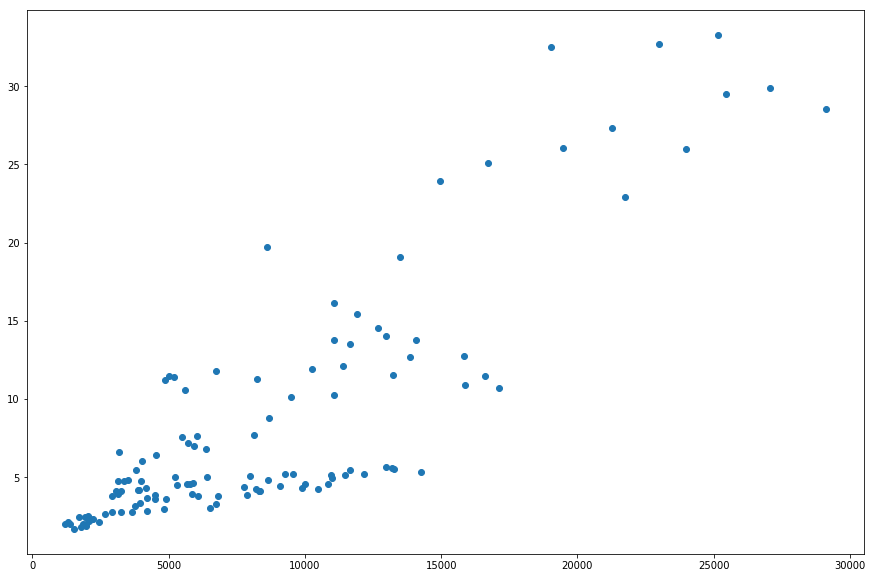

In [304]:
df_scatter_pc = df_aggby_ctry_yr[df_aggby_ctry_yr.country.isin(df_corr_filter[df_corr_filter.correlation_value>0]['country'])]
plt.rcParams['figure.figsize'] = [15, 10]
N = len(df_scatter_pc)
x = df_scatter_pc['gdp_per_capita_in_dollars']
y = df_scatter_pc['suicides_per_100k_people']
plt.scatter(x, y)
plt.show()

In [333]:
#countries and their GDPs with +ve correlation
df_countries_pc = df_cnt_years_by_country[df_cnt_years_by_country.country.isin(df_corr_filter[df_corr_filter.correlation_value>0]['country'])]
print('Min GDP: {}, Max GDP: {}, Mean GDP: {}'.format(min(df_countries_pc.gdp_per_capita_in_dollars),max(df_countries_pc.gdp_per_capita_in_dollars),df_countries_pc.gdp_per_capita_in_dollars.mean()))
df_countries_pc.sort_values('gdp_per_capita_in_dollars')

Min GDP: 2425.0416666666665, Max GDP: 16767.666666666668, Mean GDP: 8529.408333333335


,country,years,gdp_per_capita_in_dollars,gdp_min,gdp_max,gdp_diff,gdp_timesgrowth
14,Guatemala,24,2425.041667,1194,4210,3016,3.525963
3,Brazil,24,6808.416667,2924,14245,11321,4.871751
26,Mexico,24,8126.958333,4204,11663,7459,2.774263
5,Chile,24,8518.958333,3187,17140,13953,5.378099
30,Republic of Korea,24,16767.666667,8145,29120,20975,3.575200


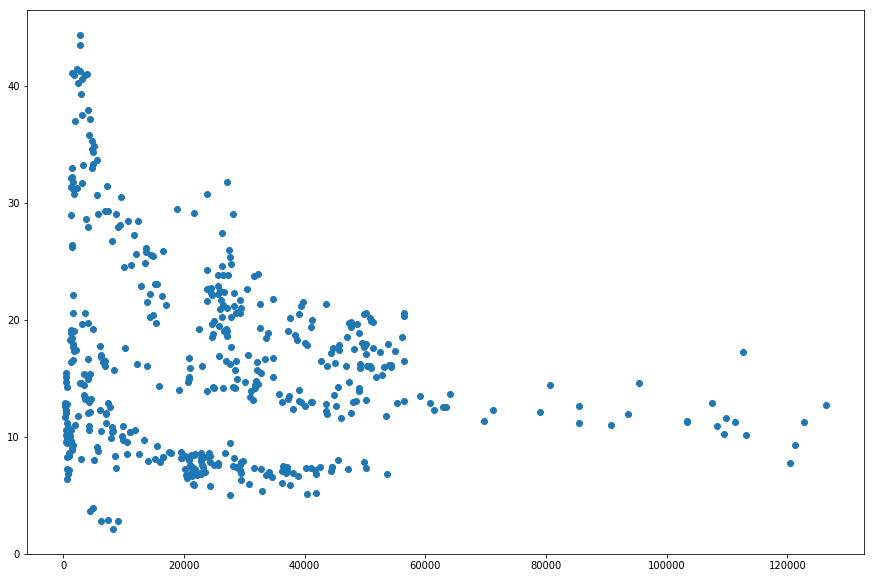

In [306]:
df_scatter_nc = df_aggby_ctry_yr[df_aggby_ctry_yr.country.isin(df_corr_filter[df_corr_filter.correlation_value<0]['country'])]
plt.rcParams['figure.figsize'] = [15, 10]
N = len(df_scatter_nc)
x = df_scatter_nc['gdp_per_capita_in_dollars']
y = df_scatter_nc['suicides_per_100k_people']
plt.scatter(x, y)
plt.show()

In [334]:
#countries and their GDPs with -ve correlation
df_countries_nc = df_cnt_years_by_country[df_cnt_years_by_country.country.isin(df_corr_filter[df_corr_filter.correlation_value<0]['country'])]
df_countries_nc = df_countries_nc.sort_values('gdp_per_capita_in_dollars')
#print(df_countries_nc[['country','gdp_min','gdp_max','gdp_diff']])
#print(df_countries_nc.sort_values('gdp_per_capita_in_dollars'))
print('Min GDP: {}, Max GDP: {}, Mean GDP: {}'.format(min(df_countries_nc.gdp_per_capita_in_dollars),max(df_countries_nc.gdp_per_capita_in_dollars),df_countries_nc.gdp_per_capita_in_dollars.mean()))
df_countries_nc.sort_values('gdp_per_capita_in_dollars').head(5)

Min GDP: 697.4583333333334, Max GDP: 78046.125, Mean GDP: 26069.625000000004


,country,years,gdp_per_capita_in_dollars,gdp_min,gdp_max,gdp_diff,gdp_timesgrowth
22,Kyrgyzstan,24,697.458333,291,1465,1174,5.034364
36,Turkmenistan,24,2696.500000,608,9046,8438,14.878289
4,Bulgaria,24,3901.875000,1213,8241,7028,6.793899
21,Kazakhstan,24,5206.250000,1225,15552,14327,12.695510
25,Mauritius,24,5997.666667,3045,11120,8075,3.651888


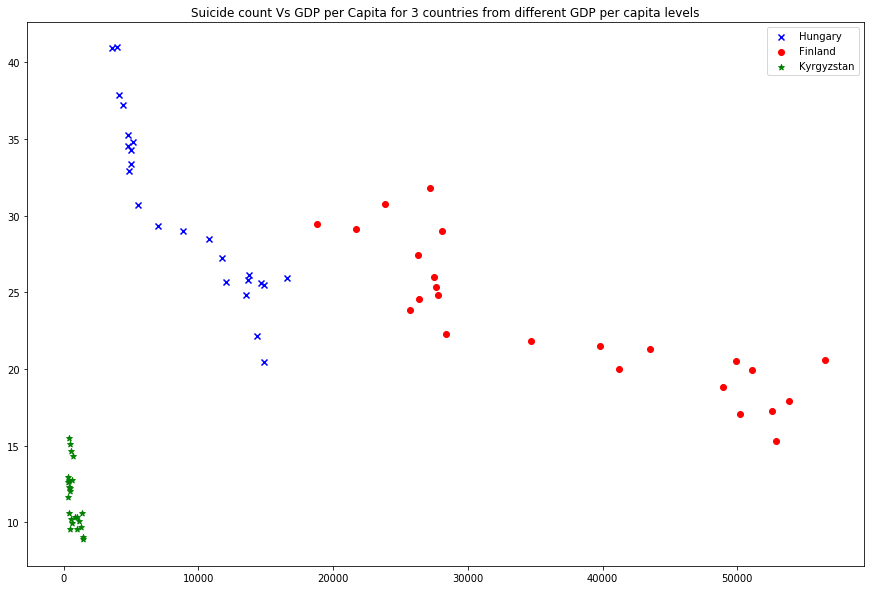

In [347]:
#Scatter plot for the 3 countries: Hungary, Finlad and Kyrgyzstan
df_scatter_hungary = df_aggby_ctry_yr[df_aggby_ctry_yr.country.isin(['Hungary'])]
df_scatter_Finland = df_aggby_ctry_yr[df_aggby_ctry_yr.country.isin(['Finland'])]
df_scatter_Kyrgyzstan = df_aggby_ctry_yr[df_aggby_ctry_yr.country.isin(['Kyrgyzstan'])]
plt.title('Suicide count Vs GDP per Capita for 3 countries from different GDP per capita levels')
plt.rcParams['figure.figsize'] = [15, 10]
N = len(df_scatter_hungary)
x_hungary = df_scatter_hungary['gdp_per_capita_in_dollars']
y_hungary = df_scatter_hungary['suicides_per_100k_people']
x_Finland = df_scatter_Finland['gdp_per_capita_in_dollars']
y_Finland = df_scatter_Finland['suicides_per_100k_people']
x_Kyrgyzstan = df_scatter_Kyrgyzstan['gdp_per_capita_in_dollars']
y_Kyrgyzstan = df_scatter_Kyrgyzstan['suicides_per_100k_people']
plt.scatter(x_hungary, y_hungary, marker='x', color='b', label="Hungary")
plt.scatter(x_Finland, y_Finland, marker='o', color='r', label="Finland")
plt.scatter(x_Kyrgyzstan, y_Kyrgyzstan, marker='*', color='g', label="Kyrgyzstan")
plt.legend(loc='upper right') 
plt.show()

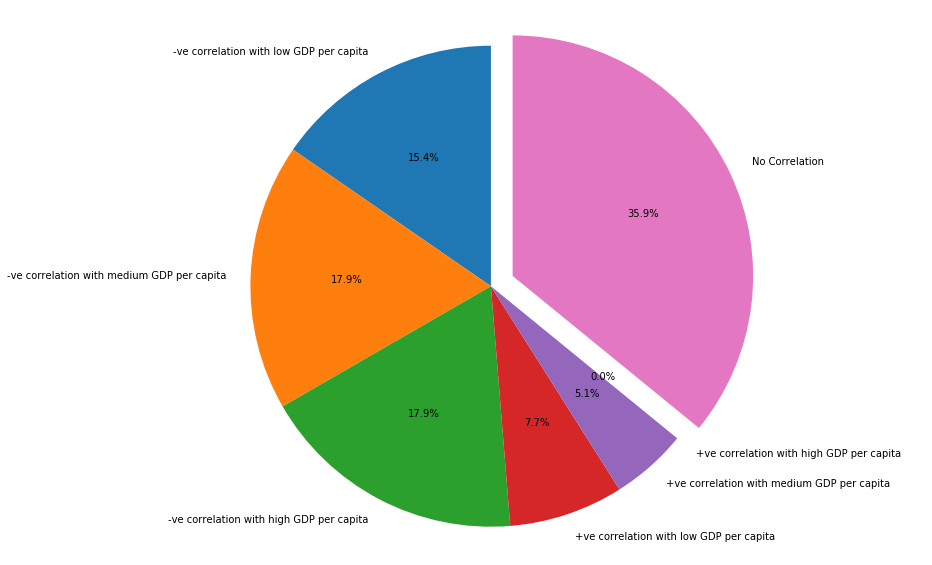

In [357]:
#Pie chart to summarize 
labels =  '-ve correlation with low GDP per capita', '-ve correlation with medium GDP per capita', '-ve correlation with high GDP per capita', '+ve correlation with low GDP per capita', '+ve correlation with medium GDP per capita', '+ve correlation with high GDP per capita', 'No Correlation'
sizes = [len(df_corr_lowGDP_filter[df_corr_lowGDP_filter.correlation_value<0]), 
         len(df_corr_mediumGDP_filter[df_corr_mediumGDP_filter.correlation_value<0]),
         len(df_corr_HighGDP_filter[df_corr_HighGDP_filter.correlation_value<0]), 
         len(df_corr_lowGDP_filter[df_corr_lowGDP_filter.correlation_value>0]), 
         len(df_corr_mediumGDP_filter[df_corr_mediumGDP_filter.correlation_value>0]), 
         len(df_corr_HighGDP_filter[df_corr_HighGDP_filter.correlation_value>0]),
         len(df_nocorr_filter)]
explode = (0, 0, 0, 0, 0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')

plt.show()


In summary, more than 50% of the countries have a negative correlation with GDP per capita. In other words, atleast half of the countries in our study have decreasing suicide rates with economy getting better. For most of the remaining countries, GDP per capita has no significant impact on the number of suicides. Looking at the statistics, it is evident that there are other compelling factors to be considered along with economic conditions to determine the cause for suicides. 

<b>An interesting observation:</b> 8 of 10 countries with highest suicide rates have a strong relationship with GDP per capita. The number of suicides are decreasing as the countries economy is getting better.